<a href="https://colab.research.google.com/github/Shivanikatakam33/ASIST2024-ChatGPT-Disinformation-Policy/blob/main/Katakam_Shivani_Exercise_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 5**

**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## **Question 1 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.


**Algorithms:**

*   MultinominalNB
*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

**Evaluation measurement:**


*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [35]:
from google.colab import files
uploaded = files.upload()

Saving stsa-test.txt to stsa-test.txt


In [36]:
from google.colab import files
uploaded = files.upload()

Saving stsa-train.txt to stsa-train.txt


In [37]:
import os
# Checkingdirectory
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)
print("\nFiles and Directories in Current Directory:")
print(os.listdir(current_directory))

Current Working Directory: /content

Files and Directories in Current Directory:
['.config', 'Amazon_Unlocked_Mobile.csv', 'stsa-test.txt', 'stsa-train.txt', 'sample_data']


In [41]:
import pandas as pd
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

def load_data(train_file, test_file):
    train_data = pd.read_csv(train_file, sep='delimiter=', header=None, names=['reviews'], engine='python')
    train_data[['sentiment', 'reviews']] = train_data['reviews'].str.split(" ", n=1, expand=True)
    test_data = pd.read_csv(test_file, sep='delimiter=', header=None, names=['reviews'], engine='python')
    test_data[['sentiment', 'reviews']] = test_data['reviews'].str.split(" ", n=1, expand=True)
    return train_data, test_data

#data processing part
def clean_text(review, stopword):
    wl = WordNetLemmatizer()
    review = "".join([word.lower() for word in review if word not in string.punctuation])
    review = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", review)
    tokens = re.split('\W+', review)
    review = [wl.lemmatize(word) for word in tokens if word not in stopword]
    return ' '.join(review)
def preprocess_data(train_data, test_data):
    nltk.download('stopwords')
    nltk.download('wordnet')
    stopword = stopwords.words('english')
    train_data['clean_reviews'] = train_data['reviews'].apply(clean_text, args=(stopword,))
    test_data['clean_reviews'] = test_data['reviews'].apply(clean_text, args=(stopword,))
    label_encoder = LabelEncoder()
    train_data['sentiment'] = label_encoder.fit_transform(train_data['sentiment'])
    test_data['sentiment'] = label_encoder.transform(test_data['sentiment'])
    return train_data, test_data
def tfidf_vectorization(train_data, test_data):
    tfidf_vect = TfidfVectorizer()
    X_tfidf = tfidf_vect.fit_transform(train_data['clean_reviews'])
    X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vect.get_feature_names_out())
    X_test_tfidf = tfidf_vect.transform(test_data['clean_reviews'])
    return X_tfidf_df, X_test_tfidf
def evaluate_model(model, X_train, y_train, X_test, y_test, cv=10):
    print("Model: ", type(model).__name__)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    print('Accuracy: {:.2f}%'.format(accuracy))
    print(classification_report(y_test, y_pred))
    scores = cross_val_score(model, X_test, y_test, cv=cv)
    print("Cross-Validation Mean Score: {:.2f}%".format(scores.mean() * 100))
    print("\n")
if __name__ == "__main__":
    train_file = 'stsa-train.txt'
    test_file = 'stsa-test.txt'

    train_data, test_data = load_data(train_file, test_file)
    train_data, test_data = preprocess_data(train_data, test_data)
    X_tfidf_df, X_test_tfidf = tfidf_vectorization(train_data, test_data)
    models = [MultinomialNB(fit_prior=False), LinearSVC(), KNeighborsClassifier(n_neighbors=5, n_jobs=-1),
              DecisionTreeClassifier(), RandomForestClassifier(), XGBClassifier()]
    for model in models:
       evaluate_model(model, X_tfidf_df, train_data['sentiment'], X_test_tfidf, test_data['sentiment'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Model:  MultinomialNB


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


Accuracy: 81.05%
              precision    recall  f1-score   support

           0       0.84      0.76      0.80       912
           1       0.78      0.86      0.82       909

    accuracy                           0.81      1821
   macro avg       0.81      0.81      0.81      1821
weighted avg       0.81      0.81      0.81      1821

Cross-Validation Mean Score: 72.32%


Model:  LinearSVC


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


Accuracy: 79.63%
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       912
           1       0.78      0.83      0.80       909

    accuracy                           0.80      1821
   macro avg       0.80      0.80      0.80      1821
weighted avg       0.80      0.80      0.80      1821

Cross-Validation Mean Score: 70.95%


Model:  KNeighborsClassifier


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Accuracy: 50.85%
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       912
           1       0.85      0.02      0.04       909

    accuracy                           0.51      1821
   macro avg       0.68      0.51      0.35      1821
weighted avg       0.68      0.51      0.35      1821

Cross-Validation Mean Score: 52.71%


Model:  DecisionTreeClassifier


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Accuracy: 65.79%
              precision    recall  f1-score   support

           0       0.65      0.69      0.67       912
           1       0.67      0.63      0.65       909

    accuracy                           0.66      1821
   macro avg       0.66      0.66      0.66      1821
weighted avg       0.66      0.66      0.66      1821

Cross-Validation Mean Score: 63.48%


Model:  RandomForestClassifier


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Accuracy: 75.12%
              precision    recall  f1-score   support

           0       0.74      0.77      0.76       912
           1       0.76      0.73      0.75       909

    accuracy                           0.75      1821
   macro avg       0.75      0.75      0.75      1821
weighted avg       0.75      0.75      0.75      1821

Cross-Validation Mean Score: 66.83%


Model:  XGBClassifier
Accuracy: 49.86%
              precision    recall  f1-score   support

           0       0.50      0.99      0.67       912
           1       0.17      0.00      0.00       909

    accuracy                           0.50      1821
   macro avg       0.33      0.50      0.33      1821
weighted avg       0.33      0.50      0.33      1821

Cross-Validation Mean Score: 65.96%




In [42]:
def clean_text(review, stopword):
    wl = WordNetLemmatizer()
    review = "".join([word.lower() for word in review if word not in string.punctuation])
    review = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", review)
    tokens = re.split('\W+', review)
    review = [wl.lemmatize(word) for word in tokens if word not in stopword]
    return ' '.join(review)

def load_data(train_file, test_file):
    train_data = pd.read_csv(train_file, sep='delimiter=', header=None, names=['reviews'], engine='python')
    train_data[['sentiment', 'reviews']] = train_data['reviews'].str.split(" ", n=1, expand=True)

    test_data = pd.read_csv(test_file, sep='delimiter=', header=None, names=['reviews'], engine='python')
    test_data[['sentiment', 'reviews']] = test_data['reviews'].str.split(" ", n=1, expand=True)

    return train_data, test_data
def train_word2vec_model(data):
    tokenized_reviews = [review.split() for review in data['clean_reviews']]
    w2v_model = Word2Vec(tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4)
    return w2v_model
def sentence_embeddings(data):
    model = SentenceTransformer('bert-base-nli-mean-tokens')
    sentence_embeddings = model.encode(data['clean_reviews'])
    return sentence_embeddings
def evaluate_model(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    report = classification_report(y_test, y_pred, output_dict=True)
    return accuracy, report
if __name__ == "__main__":
    train_file = 'stsa-train.txt'
    test_file = 'stsa-test.txt'
    train_data, test_data = load_data(train_file, test_file)
    train_data, test_data = preprocess_data(train_data, test_data)
    #using Word2Vec
    w2v_model = train_word2vec_model(train_data)
    X_train_w2v = []
    for review in train_data['clean_reviews']:
        tokens = review.split()
        review_vectors = []
        for token in tokens:
            if token in w2v_model.wv:
                review_vectors.append(w2v_model.wv[token])
        if review_vectors:
            review_vectors = np.array(review_vectors)
            X_train_w2v.append(review_vectors.mean(axis=0))
        else:
            X_train_w2v.append([0]*100)
    X_test_w2v = []
    for review in test_data['clean_reviews']:
        tokens = review.split()
        review_vectors = []
        for token in tokens:
            if token in w2v_model.wv:
                review_vectors.append(w2v_model.wv[token])
        if review_vectors:
            review_vectors = np.array(review_vectors)
            X_test_w2v.append(review_vectors.mean(axis=0))
        else:
            X_test_w2v.append([0]*100)
    #using BERT
    X_train_bert = sentence_embeddings(train_data)
    X_test_bert = sentence_embeddings(test_data)
    #model training and evaluation
    rf_model_w2v = RandomForestClassifier()
    accuracy_w2v, report_w2v = evaluate_model(X_train_w2v, train_data['sentiment'], X_test_w2v, test_data['sentiment'], rf_model_w2v)
    rf_model_bert = RandomForestClassifier()
    accuracy_bert, report_bert = evaluate_model(X_train_bert, train_data['sentiment'], X_test_bert, test_data['sentiment'], rf_model_bert)
    print("-----Results using Word2Vec:------")
    print('Accuracy: {:.2f}%'.format(accuracy_w2v))
    print("Classification Report:")
    print(report_w2v)
    print("\n")
    print("-----Results using BERT:-------")
    print('Accuracy: {:.2f}%'.format(accuracy_bert))
    print("Classification Report:")
    print(report_bert)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


-----Results using Word2Vec:------
Accuracy: 56.45%
Classification Report:
{'0': {'precision': 0.5771725032425421, 'recall': 0.48793859649122806, 'f1-score': 0.5288175876411171, 'support': 912.0}, '1': {'precision': 0.5552380952380952, 'recall': 0.6413641364136413, 'f1-score': 0.5952016334864727, 'support': 909.0}, 'accuracy': 0.5645249862712796, 'macro avg': {'precision': 0.5662052992403186, 'recall': 0.5646513664524346, 'f1-score': 0.5620096105637948, 'support': 1821.0}, 'weighted avg': {'precision': 0.5662233671217063, 'recall': 0.5645249862712796, 'f1-score': 0.5619549284831974, 'support': 1821.0}}


-----Results using BERT:-------
Accuracy: 78.36%
Classification Report:
{'0': {'precision': 0.8018648018648019, 'recall': 0.7543859649122807, 'f1-score': 0.7774011299435029, 'support': 912.0}, '1': {'precision': 0.7673935617860852, 'recall': 0.812981298129813, 'f1-score': 0.7895299145299145, 'support': 909.0}, 'accuracy': 0.7836353651839648, 'macro avg': {'precision': 0.784629181825443

## **Question 2 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

**Apply the listed clustering methods to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [7]:
from google.colab import files
uploaded = files.upload()

Saving Amazon_Unlocked_Mobile.csv to Amazon_Unlocked_Mobile.csv


In [8]:
import os
# Checkingdirectory
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)
print("\nFiles and Directories in Current Directory:")
print(os.listdir(current_directory))

Current Working Directory: /content

Files and Directories in Current Directory:
['.config', 'Amazon_Unlocked_Mobile.csv', 'sample_data']


In [9]:
import pandas as pd
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import re
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
nltk.download('wordnet')
data_df = pd.read_csv("Amazon_Unlocked_Mobile.csv")
data_df
print("Shape: {0}".format(data_df.shape))
cluster_data_df = data_df.head(100)
cluster_data_df


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Shape: (413840, 6)


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
95,"""Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...",Nokia,299.00,5,very well,0.0
96,"""Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...",Nokia,299.00,1,Cannot connect to GSM network,0.0
97,"""Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...",Nokia,299.00,4,"This cell phone exceeded my expectations, it's...",1.0
98,"""Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...",Nokia,299.00,4,"pros.. it works fine, its easy to use, not too...",1.0


In [12]:
#data preprocessing
import nltk
nltk.download('punkt_tab')
cluster_data_df['After noise removal'] = cluster_data_df['Reviews'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))
cluster_data_df['Punctuation removal'] = cluster_data_df['After noise removal'].str.replace('[^\w\s]','')
cluster_data_df['Remove numbers'] = cluster_data_df['Punctuation removal'].str.replace('\d+', '')
stop_word = stopwords.words('english')
cluster_data_df['Stopwords removal'] = cluster_data_df['Remove numbers'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_word))
cluster_data_df['Lower casing'] = cluster_data_df['Stopwords removal'].apply(lambda x: " ".join(x.lower() for x in x.split()))
cluster_data_df['Tokenization'] = cluster_data_df['Lower casing'].apply(lambda x: TextBlob(x).words)
st = PorterStemmer()
cluster_data_df['Stemming'] = cluster_data_df['Tokenization'].apply(lambda x: " ".join([st.stem(word) for word in x]))
cluster_data_df['Lemmatization'] = cluster_data_df['Stemming'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
cluster_data_df

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
<ipython-input-12-5c0f31e7d319>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data_df['After noise removal'] = cluster_data_df['Reviews'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))  #Special characters removal
<ipython-input-12-5c0f31e7d319>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data_df['Punctuation removal'] = cluster_data_df

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,After noise removal,Punctuation removal,Remove numbers,Stopwords removal,Lower casing,Tokenization,Stemming,Lemmatization
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,I feel so LUCKY to have found this used phone...,I feel so LUCKY to have found this used phone...,I feel so LUCKY to have found this used phone...,I feel LUCKY found used phone us used hard pho...,i feel lucky found used phone us used hard pho...,"[i, feel, lucky, found, used, phone, us, used,...",i feel lucki found use phone us use hard phone...,i feel lucki found use phone u use hard phone ...
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,nice phone nice up grade from my pantach revu...,nice phone nice up grade from my pantach revu...,nice phone nice up grade from my pantach revu...,nice phone nice grade pantach revue Very clean...,nice phone nice grade pantach revue very clean...,"[nice, phone, nice, grade, pantach, revue, ver...",nice phone nice grade pantach revu veri clean ...,nice phone nice grade pantach revu veri clean ...
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,Very pleased,Very pleased,Very pleased,Very pleased,very pleased,"[very, pleased]",veri pleas,veri plea
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,It works good but it goes slow sometimes but i...,It works good but it goes slow sometimes but i...,It works good but it goes slow sometimes but i...,It works good goes slow sometimes good phone I...,it works good goes slow sometimes good phone i...,"[it, works, good, goes, slow, sometimes, good,...",it work good goe slow sometim good phone i love,it work good goe slow sometim good phone i love
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,Great phone to replace my lost phone The only...,Great phone to replace my lost phone The only...,Great phone to replace my lost phone The only...,Great phone replace lost phone The thing volum...,great phone replace lost phone the thing volum...,"[great, phone, replace, lost, phone, the, thin...",great phone replac lost phone the thing volum ...,great phone replac lost phone the thing volum ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"""Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...",Nokia,299.00,5,very well,0.0,very well,very well,very well,well,well,[well],well,well
96,"""Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...",Nokia,299.00,1,Cannot connect to GSM network,0.0,Cannot connect to GSM network,Cannot connect to GSM network,Cannot connect to GSM network,Cannot connect GSM network,cannot connect gsm network,"[can, not, connect, gsm, network]",can not connect gsm network,can not connect gsm network
97,"""Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...",Nokia,299.00,4,"This cell phone exceeded my expectations, it's...",1.0,This cell phone exceeded my expectations it s...,This cell phone exceeded my expectations it s...,This cell phone exceeded my expectations it s...,This cell phone exceeded expectations user fri...,this cell phone exceeded expectations user fri...,"[this, cell, phone, exceeded, expectations, us...",thi cell phone exceed expect user friendli eve...,thi cell phone exceed expect user friendli eve...
98,"""Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...",Nokia,299.00,4,"pros.. it works fine, its easy to use, not too...",1.0,pros it works fine its easy to use not too...,pros it works fine its easy to use not too...,pros it works fine its easy to use not too...,pros works fine easy use heavy cons apps andro...,pros works fine easy use heavy cons apps andro...,"[pros, works, fine, easy, use, heavy, cons, ap...",pro work fine easi use heavi con a

In [14]:
#K-means clustering
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(cluster_data_df['Lemmatization'].values)
tfidf.shape
from sklearn.cluster import KMeans
model_tf = KMeans(n_clusters=15, random_state=150)
model_tf.fit(tfidf)
labels_tf = model_tf.labels_
cluster_center_tf=model_tf.cluster_centers_
cluster_center_tf

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00429639, ..., 0.00915152, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.0323789 , 0.01405476, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [21]:
terms1 = tfidf_vect.get_feature_names_out()
terms1[1:10]
from sklearn import metrics
silhouette_score_tf = metrics.silhouette_score(tfidf, labels_tf, metric='euclidean')
silhouette_score_tf

0.09596170859258661

In [22]:
df1 = cluster_data_df
df1['Tfidf Clus Label'] = model_tf.labels_
df1.head(5)
df1.groupby(['Tfidf Clus Label'])['Reviews'].count()

<ipython-input-22-f0b5787df65a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Tfidf Clus Label'] = model_tf.labels_


,Reviews
Tfidf Clus Label,
0,2
1,16
2,4
3,5
4,13
5,8
6,6
7,7
8,5


In [23]:
print("Top terms per cluster:")
order_centroids = model_tf.cluster_centers_.argsort()[:, ::-1]
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms1[ind], end='')
        print()

Top terms per cluster:
Cluster 0: stay
 money
 lost
 charg
 buy
 splaniish
 intern
 understand
 languag
 dont
Cluster 1: phone
 the
 use
 thi
 want
 featur
 it
 nokia
 work
 get
Cluster 2: ship
 expect
 quickli
 describ
 exactli
 fast
 met
 complain
 price
 situat
Cluster 3: good
 choic
 condit
 work
 you
 is
 for
 econom
 sophist
 solut
Cluster 4: phone
 great
 solid
 littl
 old
 thank
 the
 happi
 classi
 sharp
Cluster 5: excel
 product
 recommend
 price
 right
 condit
 perfect
 phone
 impress
 option
Cluster 6: excelent
 your
 faster
 firm
 fine
 find
 final
 file
 fianc
 fi
Cluster 7: problem
 no
 work
 phone
 wonder
 mic
 great
 price
 chang
 anyway
Cluster 8: well
 perfect
 practic
 satisfi
 handl
 veri
 everi
 way
 friendli
 pack
Cluster 9: it
 sometim
 arabian
 goe
 came
 good
 slow
 keyboard
 screen
 love


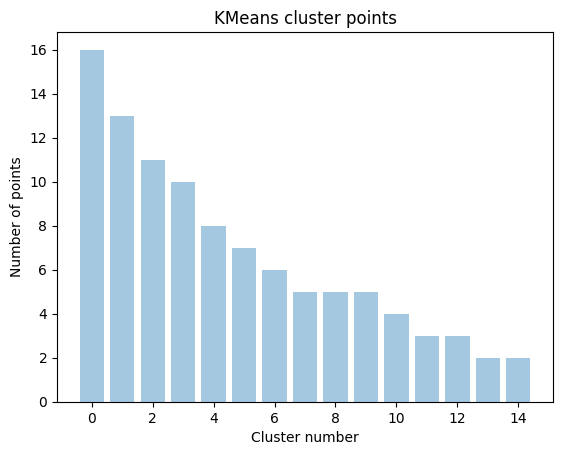

4 reviews assigned to cluster  0
----------------------------------------------------------------------
Phone looks good but wouldn't stay charged, had to buy new battery. Still couldn't stay charged long.so I trashed it.MONEY lost, never again will I buy from this person! !!!


______________________________________________________________________
4 reviews assigned to cluster  1
----------------------------------------------------------------------
I originally was using the Samsung S2 Galaxy for Sprint and wanted to return back to the Samsung EPIC 4G for Sprint because I really missed the keyboard, I really liked the smaller compact size of the phone, and I still needed some of the basic functions of a smart phone (i.e. checking e-mail, getting directions, text messaging) Because the phone is not as powerful as the newer cell phones out there, just be aware that the more applications you install the slower the phone runs and will most likely freeze up from time to time. But the came

In [24]:
import matplotlib.pyplot as plt
cluster_counts = df1['Tfidf Clus Label'].value_counts()
x_range = range(len(cluster_counts))
plt.bar(x_range, cluster_counts, alpha=0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()
for i in range(10):
    print("4 reviews assigned to cluster ", i)
    print("-" * 70)
    group_indices = df1.groupby(['Tfidf Clus Label']).groups.get(i, [])
    if len(group_indices) > 0:
        print(df1.iloc[group_indices[0]]['Reviews'])
        print('\n')
    if len(group_indices) > 5:
        print(df1.iloc[group_indices[5]]['Reviews'])
        print('\n')
    if len(group_indices) > 10:
        print(df1.iloc[group_indices[10]]['Reviews'])
        print('\n')
    print("_" * 70)

Silhouette Score: 0.28948709081526713


<ipython-input-34-3e7cb7575d61>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data_df['Bow Clus Label'] = kmeans_model.labels_
<ipython-input-34-3e7cb7575d61>:31: RuntimeWarning: invalid value encountered in divide
  sent_vec /= cnt_words
<ipython-input-34-3e7cb7575d61>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data_df['AVG-W2V '] = model.labels_


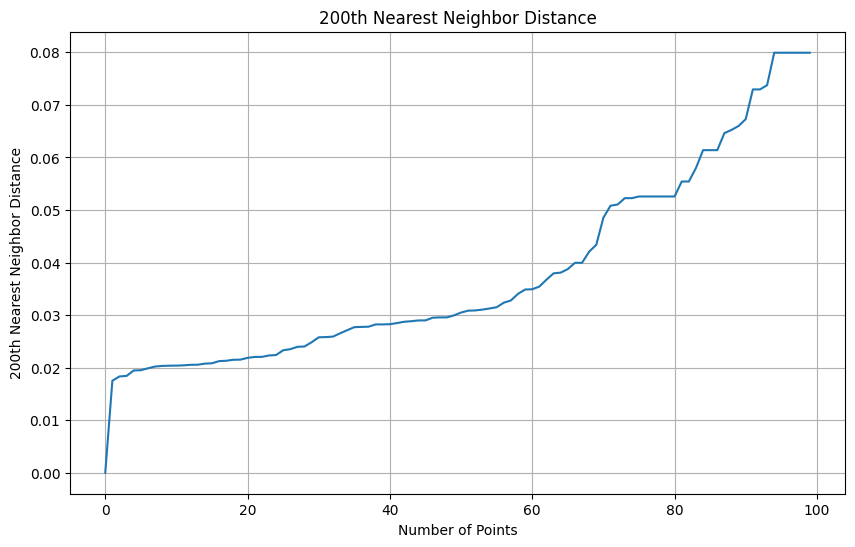

In [34]:
#DBSCAN clustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import gensim
count_vect = CountVectorizer()
bow = count_vect.fit_transform(cluster_data_df['Reviews'].values)
kmeans_model = KMeans(n_clusters=10, random_state=42)
kmeans_model.fit(bow)
labels = kmeans_model.labels_
silhouette_score = metrics.silhouette_score(bow, labels, metric='euclidean')
print("Silhouette Score:", silhouette_score)
cluster_data_df['Bow Clus Label'] = kmeans_model.labels_
list_of_sent_train = [sentence.split() for sentence in cluster_data_df["Lower casing"].values]   # Train Word2Vec model
w2v_model = gensim.models.Word2Vec(list_of_sent_train, vector_size=100, workers=4)
sent_vectors = []
for sent in list_of_sent_train:
    sent_vec = np.zeros(100)
    cnt_words = 0
    for word in sent:
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except KeyError:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
sent_vectors = np.nan_to_num(sent_vectors)
minPts = 2 * 150
model = DBSCAN(eps=5, min_samples=minPts, n_jobs=-1)
model.fit(sent_vectors)
cluster_data_df['AVG-W2V '] = model.labels_
distances = pairwise_distances(sent_vectors)
sorted_distances = np.sort(distances, axis=0)
if len(sorted_distances[0]) > 99:
    twohundredth_nearest_distances = sorted_distances[:, 99]
else:
    print("Number of data points is less than 100, cannot compute 100th nearest neighbor distance.")
if len(twohundredth_nearest_distances) > 0:
    plt.figure(figsize=(10, 6))
    plt.plot(twohundredth_nearest_distances)
    plt.title("200th Nearest Neighbor Distance")
    plt.xlabel("Number of Points")
    plt.ylabel("200th Nearest Neighbor Distance")
    plt.grid(True)
    plt.show()


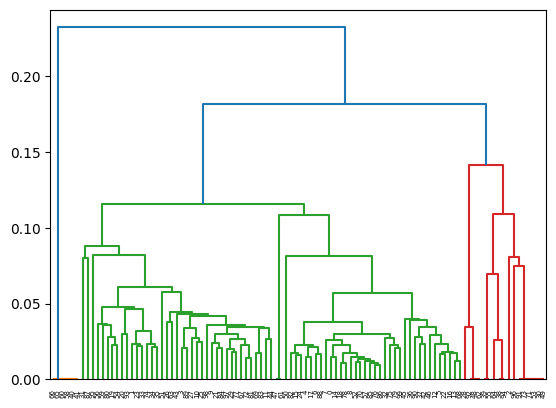

In [26]:
#Hierarchial Clustering
import scipy
from scipy.cluster import hierarchy
dendro = hierarchy.dendrogram(hierarchy.linkage(sent_vectors,method = 'ward'))
plt.axhline(y = 1000)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (85) found smaller than n_clusters (100). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


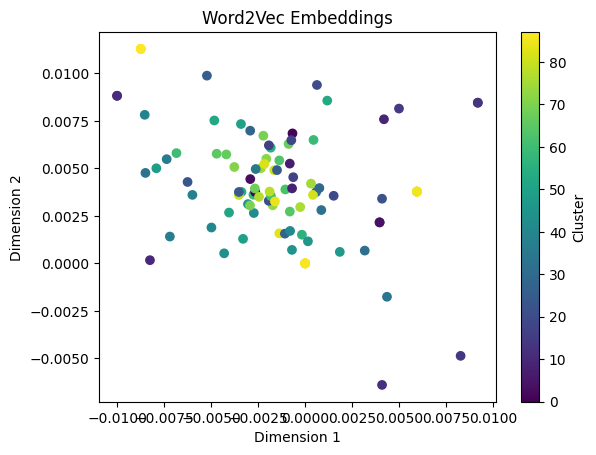

In [30]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
kmeans = KMeans(n_clusters=100)
kmeans.fit(sent_vectors)
clusters = kmeans.predict(sent_vectors)
plt.scatter(sent_vectors[:, 0], sent_vectors[:, 1], c=clusters, cmap='viridis')
plt.title('Word2Vec Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(label='Cluster')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (100). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


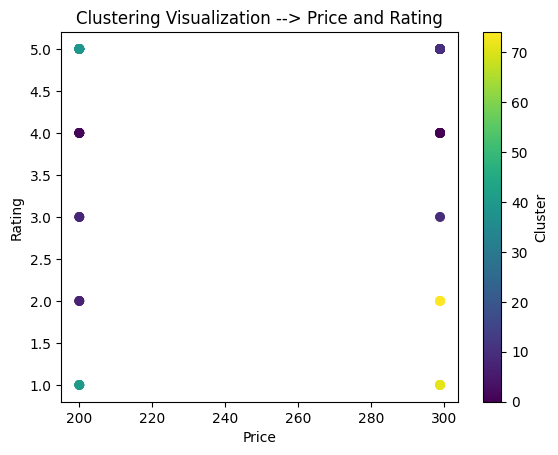

In [31]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
X = cluster_data_df[['Price', 'Rating']]
kmeans = KMeans(n_clusters=100)
kmeans.fit(X)
clusters = kmeans.predict(X)
#clustering results
plt.scatter(X['Price'], X['Rating'], c=clusters, cmap='viridis')
plt.title('Clustering Visualization --> Price and Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.colorbar(label='Cluster')
plt.show()

**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

K-means is centroid-based, it typically generates spherical clusters of uniform size. DBSCAN is very good at detecting noise and clusters of arbitrary shapes, its performance is highly dependent on the choice of eps and min_samples.Hierarchical clustering offers greater flexibility in creating clusters at different levels by providing a dendrogram to display links across clusters, it can be computationally costly for large datasets. Word2Vec captures semantic links between words by creating word embeddings and averaging them to represent documents, albeit averaging may cause contextual nuances to be lost. BERT offers the most accurate depiction thanks to its contextual embeddings.





# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.


**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
This exercise is time consuming. but, we can learn different algorithms and models.